<a href="https://colab.research.google.com/github/AJH0625/DeepLearning-Study/blob/main/%EB%AA%A8%EB%A5%B4%EA%B2%A0%EB%8B%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_df = pd.read_csv('train.csv',encoding='cp949')
test_df = pd.read_csv('test.csv',encoding='cp949')
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.set_index('date_time', inplace=True)
test_df.set_index('date_time',inplace=True)
len_train_df = len(train_df)
len_test_df = len(test_df)
train_df.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,전력사용량(kWh)
date_time,,,,,,,,
2020-06-01 00,17.6,2.5,92.0,0.8,0.0,0.0,0.0,8179.056
2020-06-01 01,17.7,2.9,91.0,0.3,0.0,0.0,0.0,8135.640
2020-06-01 02,17.5,3.2,91.0,0.0,0.0,0.0,0.0,8107.128
2020-06-01 03,17.1,3.2,91.0,0.0,0.0,0.0,0.0,8048.808
2020-06-01 04,17.0,3.3,92.0,0.0,0.0,0.0,0.0,8043.624


In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["전력사용량(kWh)"])>0.1]
top_corr_features

Index(['기온(°C)', '풍속(m/s)', '일조(hr)', '비전기냉방설비운영', '태양광보유', '전력사용량(kWh)'], dtype='object')

In [ ]:
train_y_label = train_df['전력사용량(kWh)']
train_df.drop(['전력사용량(kWh)'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
electric_df = pd.concat((train_df, test_df), axis=0)
electric_df_index = electric_df.index

print('Length of E.P Dataset: ',len(electric_df))
electric_df.head()

Length of E.P Dataset:  132480


,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
date_time,,,,,,,
2020-06-01 00,17.6,2.5,92.0,0.8,0.0,0.0,0.0
2020-06-01 01,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2020-06-01 02,17.5,3.2,91.0,0.0,0.0,0.0,0.0
2020-06-01 03,17.1,3.2,91.0,0.0,0.0,0.0,0.0
2020-06-01 04,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
check_null = electric_df.isna().sum() / len(electric_df)

check_null[check_null >= 0.5]

Series([], dtype: float64)

In [ ]:
remove_cols = check_null[check_null >= 0.5].keys()
electric_df = electric_df.drop(remove_cols, axis=1)

electric_df.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
date_time,,,,,,,
2020-06-01 00,17.6,2.5,92.0,0.8,0.0,0.0,0.0
2020-06-01 01,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2020-06-01 02,17.5,3.2,91.0,0.0,0.0,0.0,0.0
2020-06-01 03,17.1,3.2,91.0,0.0,0.0,0.0,0.0
2020-06-01 04,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [ ]:
train_df = electric_df[:len_train_df]
test_df = electric_df[len_train_df:]

train_df['전력사용량(kWh)'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))

train set length:  122400
test set length:  10080


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop(['전력사용량(kWh)'],axis=1)
y_train = train_df['전력사용량(kWh)']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_test = test_df
test_id_idx = test_df.index

print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test : ',len(X_test))

X_train :  97920
X_val :  24480
X_test :  10080


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5, 0.7, 1],
    'colsample_bylevel':[0.5, 0.7, 1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

[15:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bylevel': 0.7, 'colsample_bytree': 1, 'max_depth': 4, 'n_estimators': 550}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=550,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
pred_val = grid_search.predict(X_val)

print('train mae score: ',mean_absolute_error(y_train, pred_train))
print('val mae score: ',mean_absolute_error(y_val, pred_val))

train mae score:  1218.2357237696126
val mae score:  1239.6918492990014


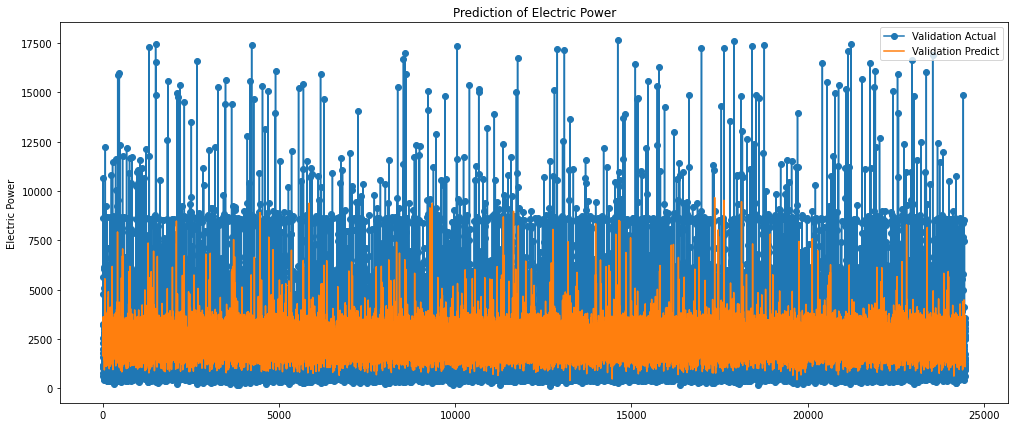

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_val)), y_val, 'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '-', label='Validation Predict')
plt.title('Prediction of Electric Power')
plt.ylabel('Electric Power')
plt.legend()